In [2]:
# this notebook is following kaggle kernel here:
# https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('seaborn-whitegrid')

# Read Data

In [3]:
#read train data
df_train = pd.read_csv('data/train.csv', nrows = 200000, parse_dates=['pickup_datetime'])
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df_train.dtypes

key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [5]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [6]:
## read test data
df_test = pd.read_csv('data/test.csv', parse_dates=['pickup_datetime'])
df_test.head()
print("Size of test data: {}".format(len(df_test)))

Size of test data: 9914


In [7]:
## the location data of test set seems good
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Missing Data

In [8]:
## missing data points
print(df_train.isna().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [9]:
## remove missing data
print("Old size: {}".format(len(df_train)))
df_train = df_train.dropna(how='any', axis='rows')
print("New size: {}".format(len(df_train)))

Old size: 200000
New size: 199999


# Fares

In [10]:
# data removing, remove the non-realistic data points, remove negative fare
print("Old size: {}".format(len(df_train)))
df_train=df_train[df_train.fare_amount>=0]
print("New size: {}".format(len(df_train)))

Old size: 199999
New size: 199986


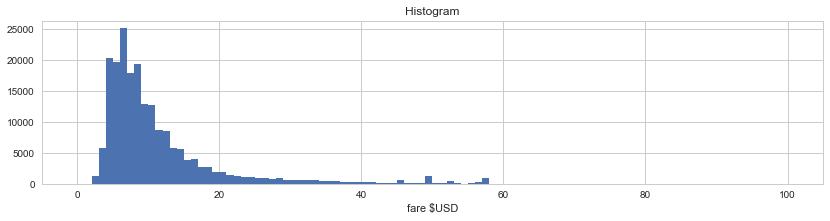

In [11]:
#fare dist
df_train[df_train.fare_amount<=100].fare_amount.hist(bins = 100, figsize=(14, 3))
plt.xlabel('fare $USD')
plt.title('Histogram');

# Location

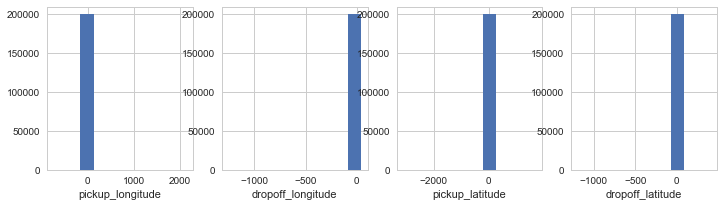

In [12]:
## distributions of  locations
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
binsize = 10
df_train.pickup_longitude.hist(bins=binsize, ax = axs[0])
axs[0].set_xlabel('pickup_longitude')
df_train.dropoff_longitude.hist(bins=binsize, ax = axs[1])
axs[1].set_xlabel('dropoff_longitude')
df_train.pickup_latitude.hist(bins=binsize, ax = axs[2])
axs[2].set_xlabel('pickup_latitude')
df_train.dropoff_latitude.hist(bins=binsize, ax = axs[3])
axs[3].set_xlabel('dropoff_latitude');

In [13]:
##we can see that some locations are 0, which should be mistakes, 
##we should remove such data points

def clean_location(df):
    return (df.pickup_longitude!=0) & (df.dropoff_longitude!=0) & \
       (df.pickup_latitude!=0) & (df.dropoff_latitude!=0)
    
##check removed data
idx = clean_location(df_train)
df_train[~idx].head(20)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
11,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00,0.0,0.0,0.000000,0.000000,3
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00,0.0,0.0,0.000000,0.000000,1
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00,0.0,0.0,0.000000,0.000000,1
124,2013-01-17 17:22:00.00000043,8.0,2013-01-17 17:22:00,0.0,0.0,0.000000,0.000000,2
192,2010-09-05 17:08:00.00000092,3.7,2010-09-05 17:08:00,0.0,0.0,0.000000,0.000000,5
233,2011-07-24 01:14:35.0000002,8.5,2011-07-24 01:14:35,0.0,0.0,0.000000,0.000000,2
273,2009-10-30 18:13:00.00000021,8.1,2009-10-30 18:13:00,0.0,0.0,0.000000,0.000000,4
357,2013-07-04 16:41:27.0000002,8.5,2013-07-04 16:41:27,0.0,0.0,0.000000,0.000000,1
376,2014-05-29 05:57:22.0000001,2.5,2014-05-29 05:57:22,0.0,0.0,0.000000,0.000000,1
387,2012-11-15 08:39:00.00000095,13.0,2012-11-15 08:39:00,0.0,0.0,0.000000,0.000000,1


In [14]:
print("Old size: {}".format(len(df_train)))
df_train = df_train[clean_location(df_train)]
print("New size: {}".format(len(df_train)))

Old size: 199986
New size: 196037


In [15]:
###draw location on a map, see original post
## some noisy location in water??!! Remove these, see original post (he used photoshop...)

In [16]:
# For this plot and further analysis, we need a function to calculate the distance in miles between locations in lon,lat coordinates.
# This function is based on https://stackoverflow.com/questions/27928/
# calculate-distance-between-two-latitude-longitude-points-haversine-formula 
# return distance in miles
def distance(lat1, lon1, lat2, lon2):
    # flight distance between two points on earth
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

# Date and time

In [17]:
##add time information
def add_time(df):
    df['year'] = df.pickup_datetime.apply(lambda x:x.year)
    df['weekday'] = df.pickup_datetime.apply(lambda x:x.weekday())
    df['hour'] = df.pickup_datetime.apply(lambda x:x.hour)

add_time(df_test)
add_time(df_train)

# What affects fare?
## flight distance

count    9914.000000
mean        2.134640
std         2.468319
min         0.000000
25%         0.806712
50%         1.377836
75%         2.513634
max        62.134660
Name: distance_miles, dtype: float64

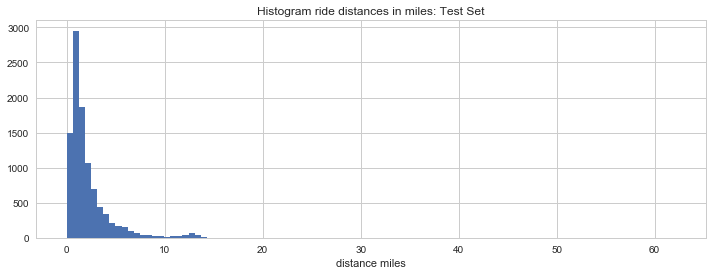

In [18]:
df_test['distance_miles'] = distance(df_test.pickup_latitude, df_test.pickup_longitude, \
                                      df_test.dropoff_latitude, df_test.dropoff_longitude)
df_test.distance_miles.hist(bins = 100, figsize=((12, 4)))
plt.xlabel('distance miles')
plt.title('Histogram ride distances in miles: Test Set')
df_test.distance_miles.describe()

Old size: 196037
New size: 196000


count    196000.000000
mean          2.085282
std           2.605146
min           0.000000
25%           0.780479
50%           1.338789
75%           2.428900
max         168.141640
Name: distance_miles, dtype: float64

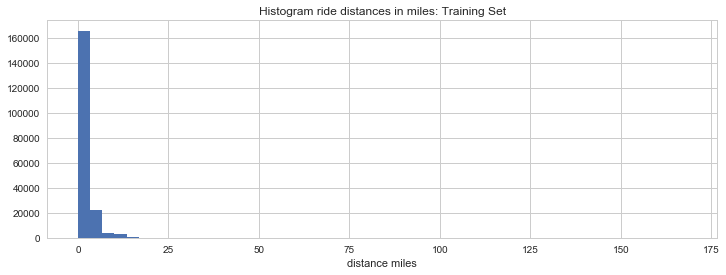

In [19]:
df_train['distance_miles'] = distance(df_train.pickup_latitude, df_train.pickup_longitude, \
                                      df_train.dropoff_latitude, df_train.dropoff_longitude)

##Some distance seems too unreasonable, so we only keep these that are smaller than 200 miles
print("Old size: {}".format(len(df_train)))
df_train = df_train[df_train.distance_miles<200] 
print("New size: {}".format(len(df_train)))
df_train.distance_miles.hist(bins = 50, figsize=((12, 4)))
plt.xlabel('distance miles')
plt.title('Histogram ride distances in miles: Training Set')
df_train.distance_miles.describe()


Text(0.5,1,'Train set: Zoom in')

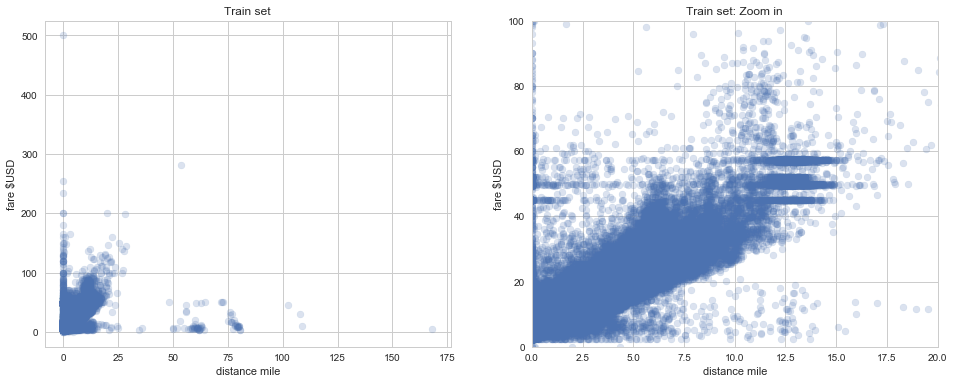

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].scatter(df_train.distance_miles, df_train.fare_amount, alpha=0.2)
axs[0].set_xlabel('distance mile')
axs[0].set_ylabel('fare $USD')
axs[0].set_title('Train set')

axs[1].scatter(df_train.distance_miles, df_train.fare_amount, alpha=0.2)
axs[1].set_xlabel('distance mile')
axs[1].set_ylabel('fare $USD')
axs[1].set_xlim([0, 20])
axs[1].set_ylim([0, 100])
axs[1].set_title('Train set: Zoom in')

In [21]:
df_train.groupby('passenger_count')['distance_miles', 'fare_amount'].mean()

,distance_miles,fare_amount
passenger_count,,
0,1.852329,9.124464
1,2.057930,11.203286
2,2.193107,11.818572
3,2.094215,11.370891
4,2.137185,11.718714
5,2.075204,11.209895
6,2.231830,12.398657


# What affects fare?

## time of day

In [22]:
print('Old size: %d' % len(df_train))
df_train = df_train[df_train.distance_miles>0.05]
print('New size: %d' % len(df_train))
df_train['fare_per_mile'] = df_train.fare_amount/df_train.distance_miles
df_train.fare_per_mile.describe()
## flight distance is not actually travelling distance

Old size: 196000
New size: 192808


count    192808.000000
mean          7.405702
std          15.910487
min           0.000000
25%           4.768131
50%           6.135574
75%           8.072824
max        3812.571628
Name: fare_per_mile, dtype: float64

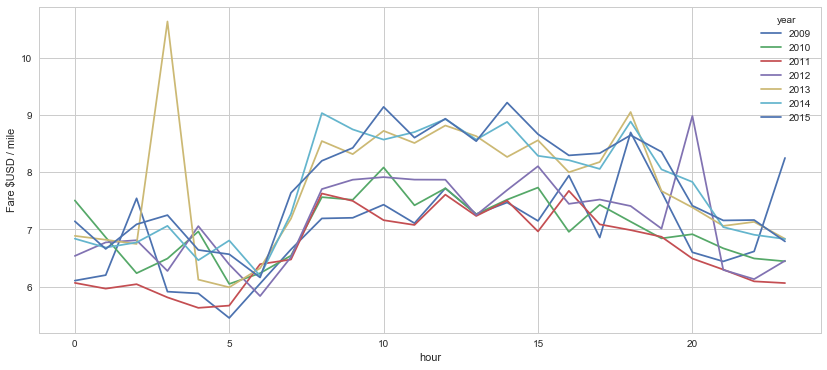

In [23]:
df_train.pivot_table('fare_per_mile', index='hour', columns='year').plot(figsize=(14, 6))
plt.ylabel('Fare $USD / mile');

# What affects fare?

## flight direction

In [26]:
def direction(delta_lon, delta_lat):
    # flight direction between two points on earth
    return np.arctan2(delta_lat, delta_lon)/np.pi*180
df_train['delta_lon'] = df_train.pickup_longitude - df_train.dropoff_longitude
df_train['delta_lat'] = df_train.pickup_latitude - df_train.dropoff_latitude
df_train['direction'] = direction(df_train.delta_lon, df_train.delta_lat)

Text(0,0.5,'average fare amount ($USD)')

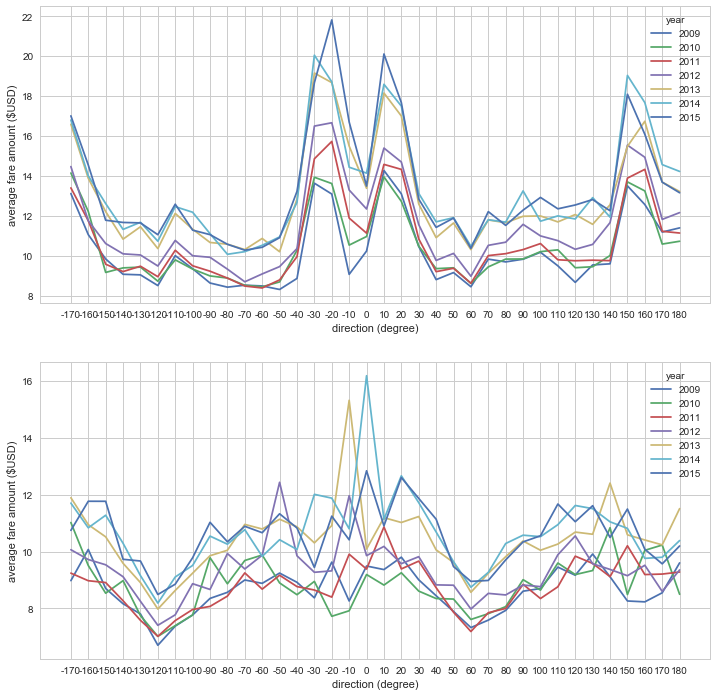

In [47]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

direc_cut = pd.cut(df_train['direction'], np.linspace(-180, 180, 37))
df_train.pivot_table('fare_amount', index=[direc_cut], columns='year').plot(ax=axs[0])
axs[0].set_xlabel('direction (degree)')
axs[0].set_xticks(range(36))
axs[0].set_xticklabels(np.arange(-170, 190, 10))
axs[0].set_ylabel('average fare amount ($USD)')

idx = (df_train.distance_miles>1.4) & (df_train.distance_miles<1.6)
direc_cut = pd.cut(df_train[idx]['direction'], np.linspace(-180, 180, 37))
df_train[idx].pivot_table('fare_amount', index=[direc_cut], columns='year').plot(ax=axs[1])
axs[1].set_xlabel('direction (degree)')
axs[1].set_xticks(range(36))
axs[1].set_xticklabels(np.arange(-170, 190, 10))
axs[1].set_ylabel('average fare amount ($USD)')

# fast reading

In [6]:
%%time
with open('data/train.csv') as f:
    n_row = len(f.readlines())
print("Number of rows {}".format(n_row))

Number of rows 55423857
CPU times: user 20.7 s, sys: 16.8 s, total: 37.4 s
Wall time: 39.1 s


In [8]:
%%time
!wc -l 'data/train.csv'

 55423856 data/train.csv
CPU times: user 153 ms, sys: 67.8 ms, total: 221 ms
Wall time: 8.08 s
